Exploring the output files generated by the Salish Sea Atlantis Model
for Scrubber Discharge Project - preliminary runs

- scenario 1: 1-year discharge for Jan - Dec 2019
- scenario 2: 5-year discharge for Jan 2019 - Dec 2023
- scenario 3: 10-year discharge for Jan 2019 - Dec 2028

In [2]:
import os
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups

## Define scenario and control files

In [42]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_2019_02_control/outputSalishSea.nc"
scenario1_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_2019_02/outputSalishSea.nc"
scenario2_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_2019-2023_02/outputSalishSea.nc"
scenario3_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_2019-2029_02/outputSalishSea.nc"

control = xr.open_dataset(str(control_file), decode_cf=True)
scenario1 = xr.open_dataset(str(scenario1_file), decode_cf=True)
scenario2 = xr.open_dataset(str(scenario2_file), decode_cf=True)
scenario3 = xr.open_dataset(str(scenario3_file), decode_cf=True)

t = np.ma.filled(scenario1.variables['t'], np.nan)

In [47]:
t_corrected = t - np.timedelta64(578, 'D')

start = 112
end = t.size-1


time = t[start:end]

spill_start = np.datetime64('2020-08-01')
scenario1_spill_end1 = np.datetime64('2019-12-31')
scenario1_spill_end2 = np.datetime64('2023-12-31')
scenario1_spill_end3 = np.datetime64('2028-12-31')

In [44]:
# Plot variables
label_size = 11
font_size = 12
line_width = 2

## Group plotting functions

- plot_benthos(group)
- plot_pelagic(group)
- plot_cohorts(group)

In [6]:
def plot_benthic(group, scenario): # benthos, shellfish

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of benthic groups across all boxes in Salish Sea Atlantis', fontsize = font_size)
    #ax.set_ylim(y_min,  y_max)

    for species in group:
        benthic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,:], np.nan) # tonnes
        benthic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:], np.nan)
        ratio = benthic_oiled.sum(axis=1) / benthic_control.sum(axis=1) 
        control_ratio = benthic_control.sum(axis=1)  / benthic_control.sum(axis=1) 
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(group) #, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(spill_start, 1, 'ro', alpha=0.5)
    #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
    return fig, ax

In [56]:
def plot_pelagic(group, scenario): #bacteria, plankton

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of pelagic groups across all boxes in Salish Sea Atlantis', fontsize = font_size)
   # ax.set_ylim([y_min, y_max])

    for species in group:
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,:,0:5], np.nan) # tonnes, take only water column layers
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:,0:5], np.nan)
        p_oiled = pelagic_oiled.sum(axis=1)
        p_control = pelagic_control.sum(axis=1)
        ratio = p_oiled.sum(axis=1) / p_control.sum(axis=1) 
        control_ratio = p_control.sum(axis=1) / p_control.sum(axis=1)
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(group, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(spill_start, 1, 'ro', alpha=0.5)
    #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
    return fig, ax

In [18]:
def plot_bacteria(scenario):

    bacteria = groups.bacteria

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of groups in sediment in Salish Sea Atlantis', fontsize = font_size)
    # ax.set_ylim([y_min, y_max])

    for species in bacteria:
        if "pelagic" in species:
            bact_oiled = np.ma.filled(scenario.variables[bacteria[species] + '_N'][start:end,:,0:5], np.nan) # tonnes, take only water column layers
            bact_control = np.ma.filled(control.variables[bacteria[species] + '_N'][start:end,:,0:5,], np.nan)
            b_oiled = bact_oiled.sum(axis=2)
            b_control = bact_control.sum(axis=2)
        else:
            b_oiled = np.ma.filled(scenario.variables[bacteria[species] + '_N'][start:end,:,6], np.nan) # tonnes, take only sediment layer
            b_control = np.ma.filled(control.variables[bacteria[species] + '_N'][start:end,:,6], np.nan)
        
        ratio = b_oiled.sum(axis=1) / b_control.sum(axis=1) 
        control_ratio = b_control.sum(axis=1) / b_control.sum(axis=1)
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(bacteria, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(spill_start, 1, 'ro', alpha=0.5)
    #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
    return fig, ax

In [19]:
def plot_sediment(group, scenario): #bacteria, plankton

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of groups in sediment in Salish Sea Atlantis', fontsize = font_size)
    #ax.set_ylim([y_min, y_max])

    for species in group:
        sed_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,:,6], np.nan) # tonnes
        sed_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:,6], np.nan)
        s_oiled = sed_oiled.sum(axis=1)
        s_control = sed_control.sum(axis=1)
        ratio = s_oiled / s_control
        control_ratio = s_control / s_control
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(group, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(spill_start, 1, 'ro', alpha=0.5)
    #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
    return fig, ax

In [8]:
def plot_cohorts(group):

    # Plot variables
    label_size = 11
    font_size = 12
    line_width = 2
    y_min = 0.5
    y_max = 1.5

    fig, ax = plt.subplots(3,1, figsize = (14,9), sharex='all')
    ax[0].set_title('Numbers - all cohorts', fontsize = font_size)
    ax[0].set_ylabel('scenario : control')
    ax[0].tick_params(labelsize=label_size)
    ax[0].set_ylim([y_min, y_max])

    ax[1].set_title('Structural Nitrogen (bone size) - all cohorts', fontsize = font_size)
    ax[1].set_ylabel('scenario : control')
    ax[1].tick_params(labelsize=label_size)
    ax[1].set_ylim([y_min, y_max])

    ax[2].set_title('Reserve Nitrogen (fatty tissue) - all cohorts', fontsize = font_size)
    ax[2].set_ylabel('scenario : control')
    ax[2].tick_params(labelsize=label_size)
    ax[2].set_ylim([y_min, y_max])

    for species in group:

        numCohorts = cohorts[group[species]]

        o1_numbers = np.ma.zeros((scenario.variables[group[species] + '1_Nums'].shape),dtype = np.int32)
        o1_structuralN = np.ma.zeros((scenario.variables[group[species] + '1_StructN'].shape),dtype = np.int32)
        o1_reservedN = np.ma.zeros((scenario.variables[group[species] + '1_ResN'].shape),dtype = np.int32)

        c1_numbers = np.ma.zeros((control.variables[group[species] + '1_Nums'].shape),dtype = np.int32)
        c1_structuralN = np.ma.zeros((control.variables[group[species] + '1_StructN'].shape),dtype = np.int32)
        c1_reservedN = np.ma.zeros((control.variables[group[species] + '1_ResN'].shape),dtype = np.int32)    

        for cohort in range (1, numCohorts+1):

            new_species = group[species] + str(cohort)
        
            o1_numbers = o1_numbers + np.ma.filled(scenario.variables[new_species + '_Nums'][:,:,:], np.nan)
            o1_structuralN = o1_structuralN + np.ma.filled(scenario.variables[new_species +'_StructN'][:,:,:], np.nan)
            o1_reservedN = o1_reservedN + np.ma.filled(scenario.variables[new_species +'_ResN'][:,:,:], np.nan)

            c1_numbers = c1_numbers + np.ma.filled(control.variables[new_species + '_Nums'][:,:,:], np.nan)
            c1_structuralN = c1_structuralN + np.ma.filled(control.variables[new_species +'_StructN'][:,:,:], np.nan)
            c1_reservedN = c1_reservedN + np.ma.filled(control.variables[new_species +'_ResN'][:,:,:], np.nan)

        o2_numbers = o1_numbers.sum(axis=2)
        o2_structuralN = o1_structuralN.sum(axis=2)
        o2_reservedN = o1_reservedN.sum(axis=2)

        c2_numbers = c1_numbers.sum(axis=2)
        c2_structuralN = c1_structuralN.sum(axis=2)
        c2_reservedN = c1_reservedN.sum(axis=2)

        numbers = o2_numbers.sum(axis=1) / c2_numbers.sum(axis=1)
        structuralN = o2_structuralN.sum(axis=1) / c2_structuralN.sum(axis=1)
        reservedN = o2_reservedN.sum(axis=1) / c2_reservedN.sum(axis=1)
    
        ax[0].plot(time, numbers[start:end], linewidth = line_width)
        ax[0].legend(group, loc='center left')
        ax[0].plot([spill_start, spill_start], [y_min, y_max], 'r', alpha=0.1)
        ax[0].plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
   
        ax[1].plot(time, structuralN[start:end],linewidth = line_width)
        ax[1].plot([spill_start, spill_start], [y_min, y_max], 'r', alpha=0.1)
        ax[1].plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)

        ax[2].plot(time, reservedN[start:end],linewidth = line_width)
        ax[2].plot([spill_start, spill_start], [y_min, y_max], 'r', alpha=0.1)
        ax[2].plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)

    return fig, ax
    

## Plotting the entire run

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

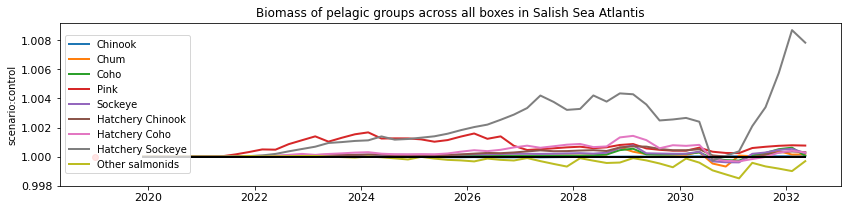

In [45]:
plot_pelagic(groups.salmon, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of groups in sediment in Salish Sea Atlantis'}, ylabel='scenario:control'>)

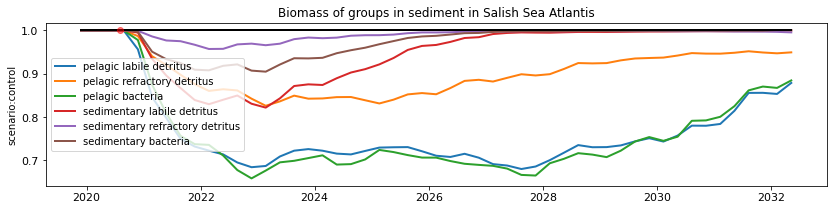

In [48]:
plot_bacteria(scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

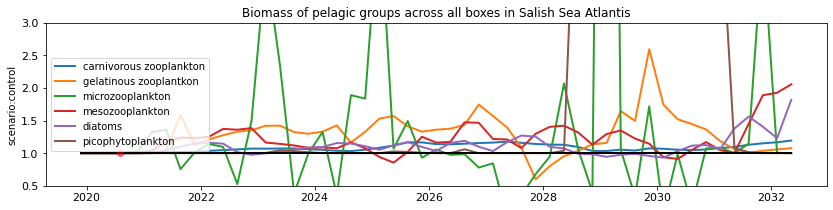

In [53]:
y_min = 0.5
y_max = 3
plot_pelagic(groups.plankton, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of benthic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

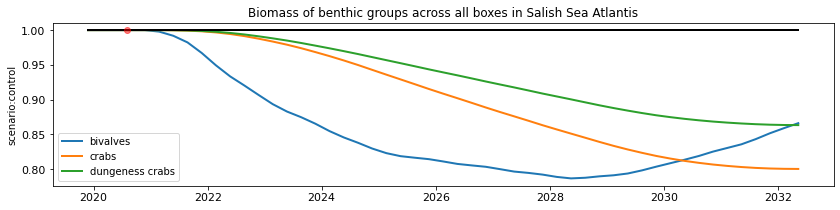

In [54]:
plot_benthic(groups.shellfish, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of benthic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

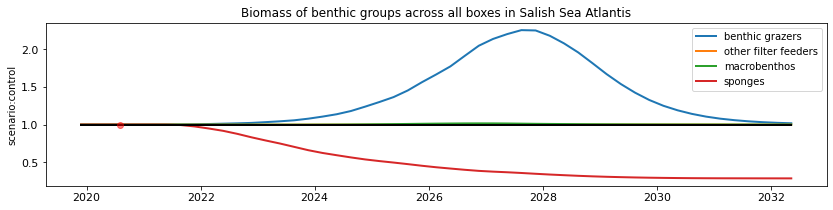

In [55]:
plot_benthic(groups.benthic_invertebrates, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of groups in sediment in Salish Sea Atlantis'}, ylabel='scenario:control'>)

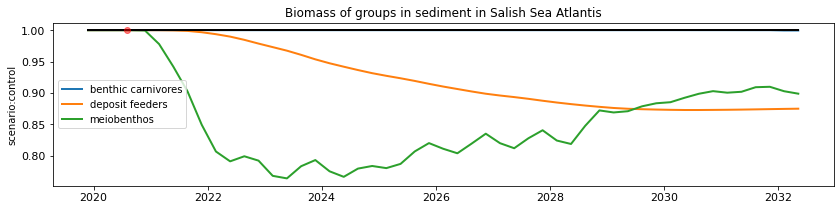

In [61]:
plot_sediment(groups.benthic_feeders, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

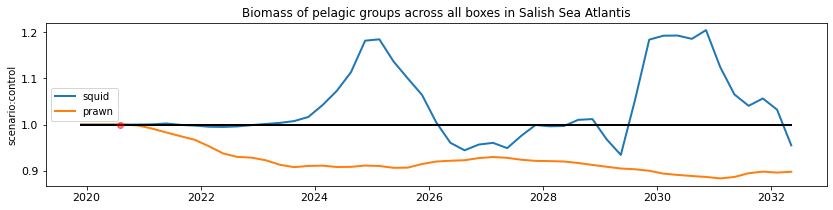

In [60]:
plot_pelagic(groups.pelagic_invertebrates, scenario1)

/tmp/ipykernel_538088/1203357538.py:14: RuntimeWarning: invalid value encountered in true_divide
  ratio = p_oiled.sum(axis=1) / p_control.sum(axis=1)
/tmp/ipykernel_538088/1203357538.py:15: RuntimeWarning: invalid value encountered in true_divide
  control_ratio = p_control.sum(axis=1) / p_control.sum(axis=1)


(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

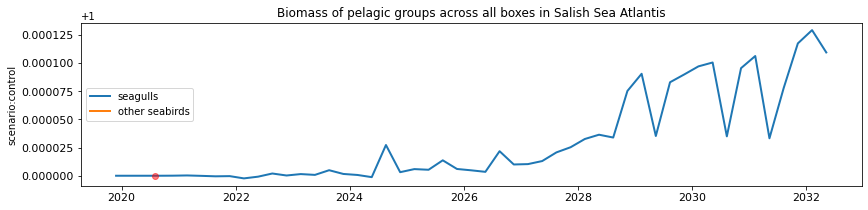

In [58]:
plot_pelagic(groups.birds, scenario1)

## High resolution simulation

In [63]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_2019_highres_mort_control/outputSalishSea.nc"
scenario1_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_2019_highres_mort/outputSalishSea.nc"

control = xr.open_dataset(str(control_file), decode_cf=True)
scenario1 = xr.open_dataset(str(scenario1_file), decode_cf=True)

In [64]:
t = np.ma.filled(scenario1.variables['t'], np.nan)

In [65]:
start = 0
end = t.size-1

time = t[start:end]

#spill_start = np.datetime64('2019-01-01')

# Plot variables
label_size = 11
font_size = 12
line_width = 2
y_min = 0.5
y_max = 1.5

In [66]:
spill_start = np.datetime64('2019-10-06')

start = 250
end = t.size-1

time = t[start:end]

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of groups in sediment in Salish Sea Atlantis'}, ylabel='scenario:control'>)

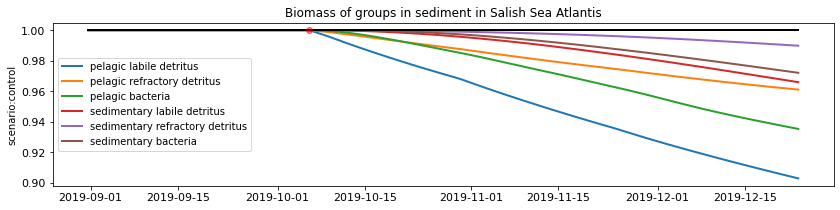

In [33]:
plot_bacteria(scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

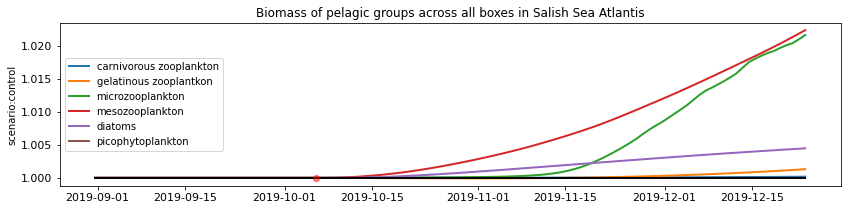

In [34]:
plot_pelagic(groups.plankton, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of benthic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

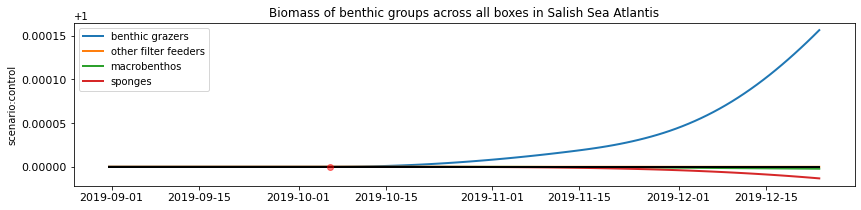

In [35]:
plot_benthic(groups.benthic_invertebrates, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of benthic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

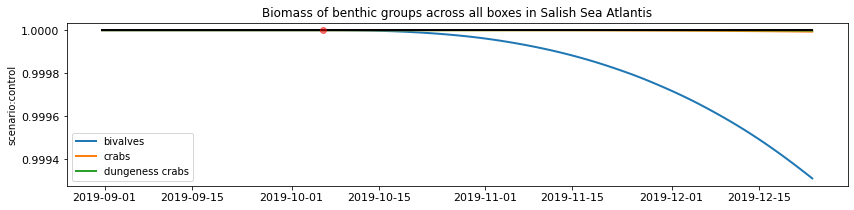

In [40]:
plot_benthic(groups.shellfish, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of benthic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

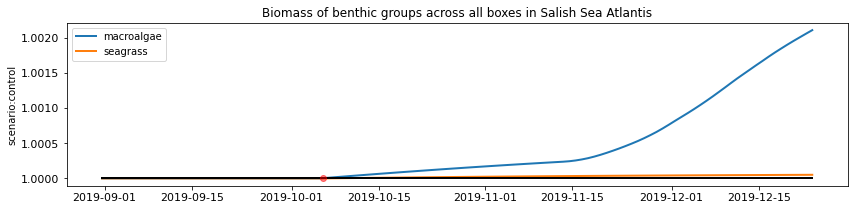

In [37]:
plot_benthic(groups.macroalgae, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

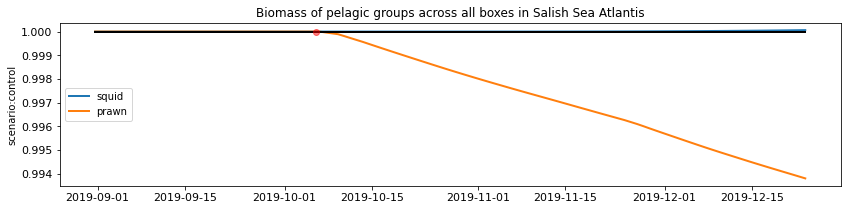

In [39]:
plot_pelagic(groups.pelagic_invertebrates, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of groups in sediment in Salish Sea Atlantis'}, ylabel='scenario:control'>)

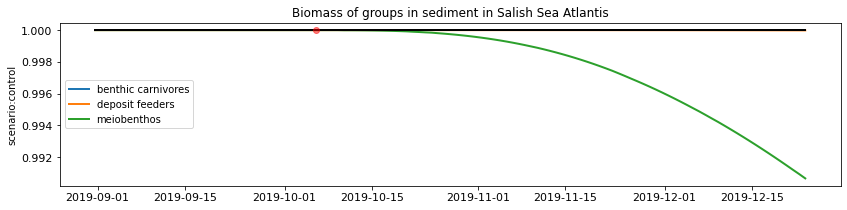

In [67]:
plot_sediment(groups.benthic_feeders, scenario1)